# Tracking ApRES locations

In [2]:
# Load libraries
import sys
sys.path.append("../../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import rioxarray
import pyproj


import xarray as xr
import importlib
import pandas as pd
import math
from datetime import datetime, timedelta, date
from scipy.stats import linregress
from scipy.interpolate import griddata

from helpers import *

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    18:37:54 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    18:37:54 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    18:37:54 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


In [3]:
bed = rioxarray.open_rasterio("bedmachine_bed.tif")
bed = bed.isel(band = 0)
proj_polar = pyproj.Proj(pyproj.Proj("EPSG:3413").definition_string())

# Define the projection for geographic coordinates (longitude, latitude)
proj_geo = pyproj.Proj("+proj=latlong +datum=WGS84")

# Function to convert lat/lon to polar stereographic coordinates
def lonlat_to_polar(lon, lat):
    x, y = pyproj.transform(proj_geo, proj_polar, lon, lat)
    return x, y

In [4]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:33305")
client

<Client: 'tcp://127.0.0.1:33305' processes=4 threads=8, memory=64.00 GiB>

In [19]:
def get_bedrock(ds):
    fig, axs = plt.subplots(ncols=2,sharex=True,sharey=True,figsize = (10,5))
    time_numeric = pd.to_datetime(ds['time'].values).astype(int) / 10**9  # Convert to seconds since epoch
    ds['x'], ds['y'] = lonlat_to_polar(ds['longitude'], ds['latitude'])
    axs[0].scatter(ds.x,ds.y,c=time_numeric,cmap='Blues')

    interp_bed = bed.interp(x=ds.x,y=ds.y)

    bed_values = np.diag(interp_bed.values)
    cbar = axs[1].scatter(interp_bed.x,interp_bed.y,c=bed_values,cmap='Blues')
    plt.colorbar(cbar,ax=axs[1])
    return bed_values



In [6]:
# A11
# Load data
ds_101 = reload("A101")
ds_101 = ds_101.isel(time=range(20,len(ds_101.time))) # trim first few bursts, which were tests

ds_101_w = reload_winter("A101")

ds_101_s = reload_summer("A101")
ds11 = ds_101[['longitude', 'latitude']]
ds11_w = ds_101_w[['longitude', 'latitude']]
ds_11_locations = xr.concat([ds11.resample(time='1W').mean(),ds11_w.resample(time='1W').mean()],dim='time').compute()

/tmp/ipykernel_7425/336427605.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = pyproj.transform(proj_geo, proj_polar, lon, lat)


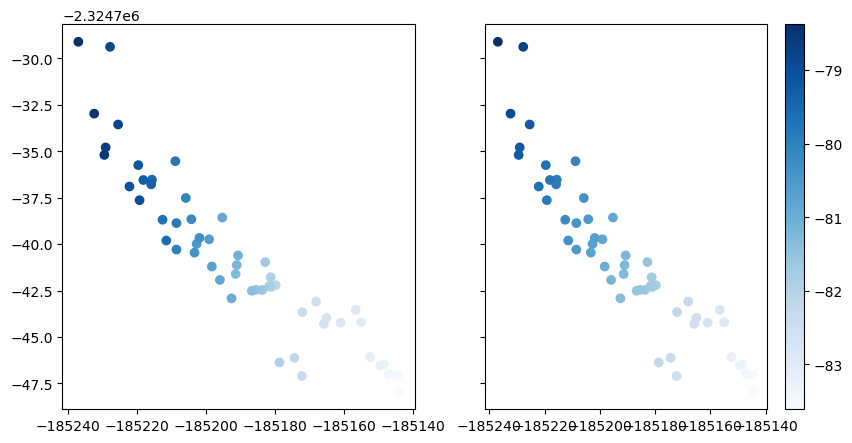

In [13]:
elev = get_bedrock(ds_11_locations)

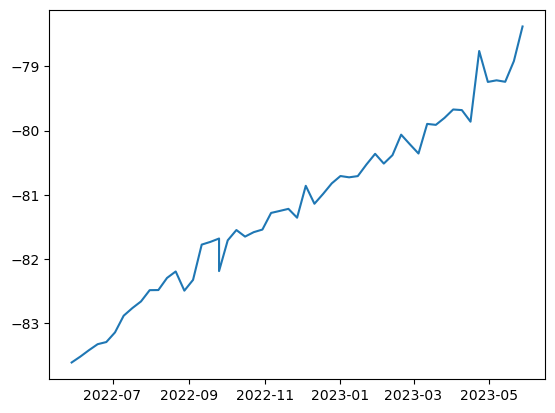

In [14]:
plt.plot(ds_11_locations.time,elev)

In [15]:
# A13
# Load data
ds_13 = reload("A103_fixed")
ds_13 = ds_13.isel(time=range(60,len(ds_13.time))) # trim first few bursts, which were tests

ds_13_w = reload_winter("A103")

ds_13_s = reload_summer("A103")
ds_13_s = ds_13_s.isel(time=range(100,len(ds_13_s.time))) # trim first few bursts, which didn't record properly

ds13 = ds_13[['longitude', 'latitude']]
ds13_w = ds_13_w[['longitude', 'latitude']]
ds13_s = ds_13_s[['longitude', 'latitude']]
ds_13_locations = xr.concat([ds13.resample(time='1W').mean(),ds13_w.resample(time='1W').mean(),ds13_s.resample(time='1W').mean()],dim='time').compute()

/tmp/ipykernel_7425/336427605.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = pyproj.transform(proj_geo, proj_polar, lon, lat)


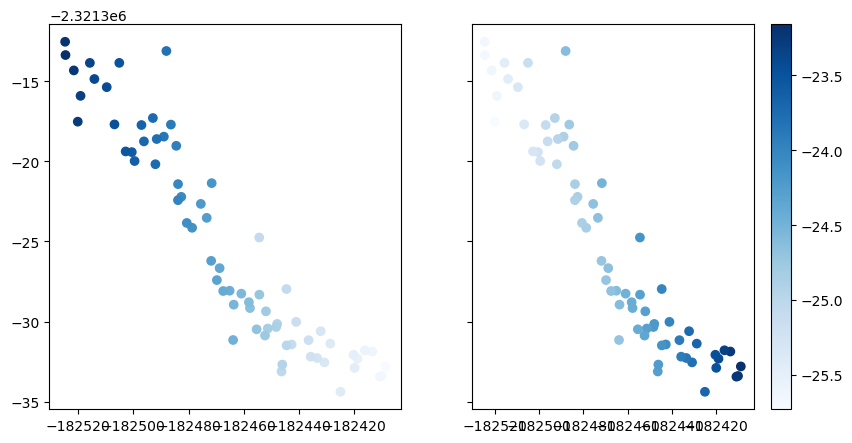

In [23]:
elev = get_bedrock(ds_13_locations)

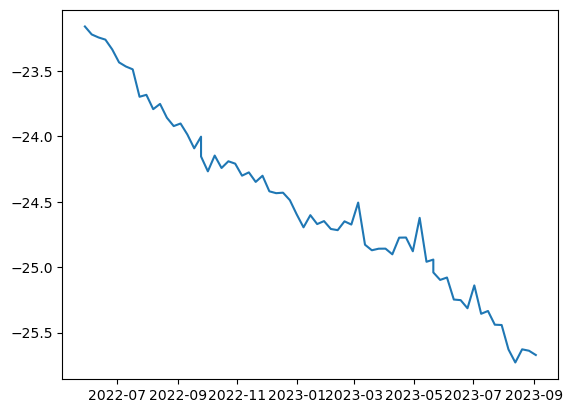

In [24]:
plt.plot(ds_13_locations.time,elev)

In [21]:
# A14
# Load data
ds_14 = reload("A104")
ds_14 = ds_14.isel(time=range(50,len(ds_14.time))) # trim first few bursts, which were tests

ds_14_w = reload_winter("A104")

ds_14_s = reload_summer("A104")

ds14 = ds_14[['longitude', 'latitude']]
ds14_w = ds_14_w[['longitude', 'latitude']]
ds14_s = ds_14_s[['longitude', 'latitude']]
ds_14_locations = xr.concat([ds14.resample(time='1W').mean(),ds14_w.resample(time='1W').mean(),ds14_s.resample(time='1W').mean()],dim='time').compute()

/tmp/ipykernel_7425/336427605.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = pyproj.transform(proj_geo, proj_polar, lon, lat)


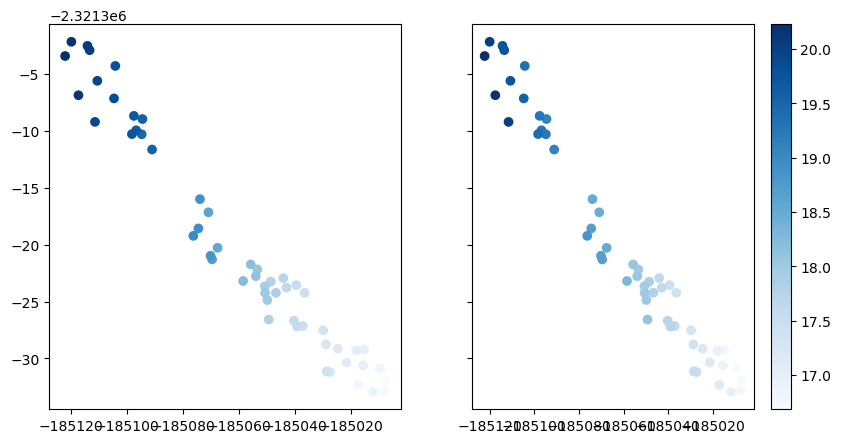

In [26]:
elev = get_bedrock(ds_14_locations)

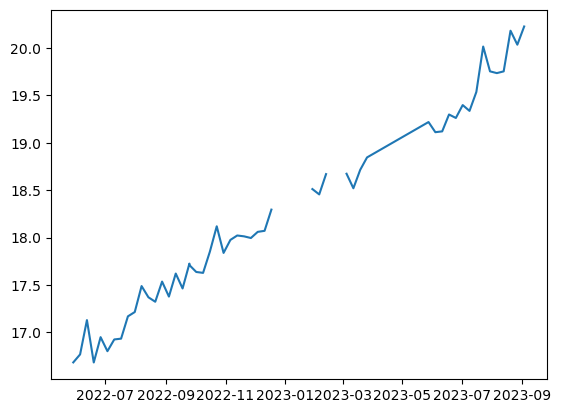

In [27]:
plt.plot(ds_14_locations.time,elev)